In [9]:
import random
import os
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential


In [10]:
categorias_tr = tf.keras.utils.image_dataset_from_directory(
    './train/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300))

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [16]:
class_names= categorias_tr.class_names

In [13]:
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


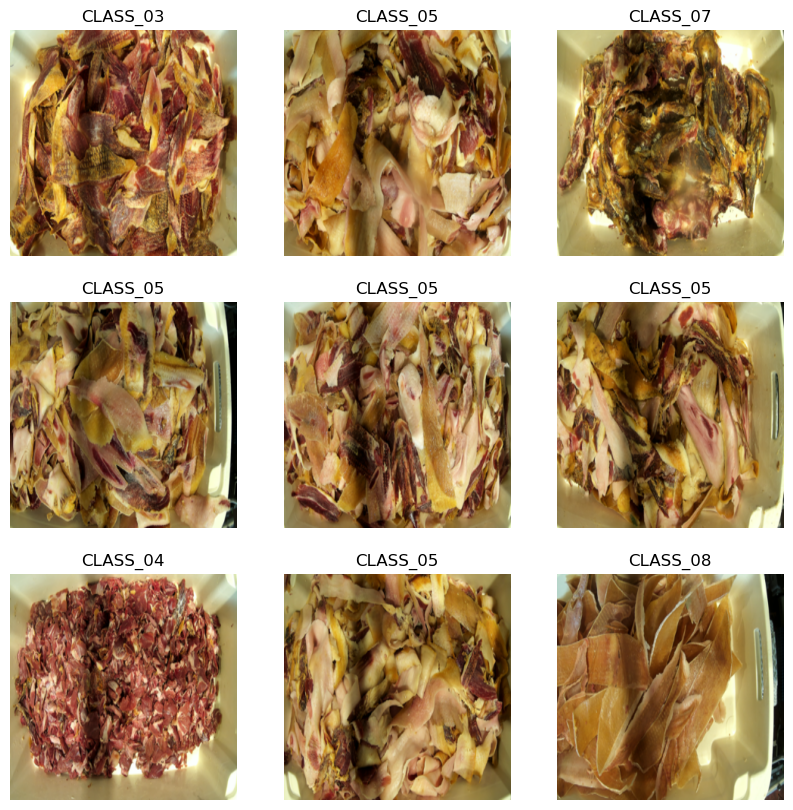

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in categorias_tr.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy(). astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")     


In [20]:
num_classes = len(class_names)

In [21]:
print(num_classes)

8


In [25]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    ])

In [26]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [28]:
epochs=20
history = model.fit(
    categorias_tr ,
    epochs=epochs
) 


Epoch 1/20
41/41 [==============================] - 43s 996ms/step - loss: 1.5933 - accuracy: 0.5608
Epoch 2/20
41/41 [==============================] - 45s 986ms/step - loss: 0.6912 - accuracy: 0.7590
Epoch 3/20
41/41 [==============================] - 50s 1s/step - loss: 0.4233 - accuracy: 0.8317
Epoch 4/20
41/41 [==============================] - 50s 1s/step - loss: 0.2226 - accuracy: 0.9258
Epoch 5/20
41/41 [==============================] - 51s 1s/step - loss: 0.1305 - accuracy: 0.9564
Epoch 6/20
41/41 [==============================] - 49s 1s/step - loss: 0.0618 - accuracy: 0.9839
Epoch 7/20
41/41 [==============================] - 51s 1s/step - loss: 0.0755 - accuracy: 0.9755
Epoch 8/20
41/41 [==============================] - 51s 1s/step - loss: 0.1280 - accuracy: 0.9495
Epoch 9/20
41/41 [==============================] - 50s 1s/step - loss: 0.0430 - accuracy: 0.9878
Epoch 10/20
41/41 [==============================] - 50s 1s/step - loss: 0.0133 - accuracy: 0.9977
Epoch 11/20
4

In [29]:
model.evaluate(categorias_tr, return_dict=True)


41/41 [==============================] - 14s 236ms/step - loss: 2.4588e-04 - accuracy: 1.0000


{'loss': 0.000245881819864735, 'accuracy': 1.0}

In [30]:
categoria_test = tf.keras.utils.image_dataset_from_directory(
          './test/',
           seed = 123,
           image_size = (300 , 300))

Found 810 files belonging to 8 classes.


In [31]:
model.evaluate(categoria_test, return_dict=True)

26/26 [==============================] - 10s 221ms/step - loss: 0.6450 - accuracy: 0.8975


{'loss': 0.6449553966522217, 'accuracy': 0.8975308537483215}

In [35]:
image_path = './test/imagentest2.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300, 300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)

1/1 [==============================] - 3s 3s/step


In [36]:
score = tf.nn.softmax(predictions[0])
print(
    "esta imagen pertenece a la {} con un {: .2f}  % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
     
    

esta imagen pertenece a la CLASS_02 con un  94.42  % de exactitud.


In [37]:
model.save('modelo')

INFO:tensorflow:Assets written to: modelo\assets


INFO:tensorflow:Assets written to: modelo\assets


Found 810 images belonging to 8 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_3060\2604851836.py:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: Undefined

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.8889    0.1667    0.2807        48
           2     0.6371    0.8144    0.7149        97
           3     0.5116    0.9778    0.6718        45
           4     0.9653    0.9085    0.9360       459
           5     1.0000    0.7895    0.8824        19
           6     0.7680    0.8421    0.8033       114
           7     0.7368    0.5185    0.6087        27

    accuracy                         0.8309       810
   macro avg     0.6885    0.6272    0.6122       810
weighted avg     0.8605    0.8309    0.8240       810



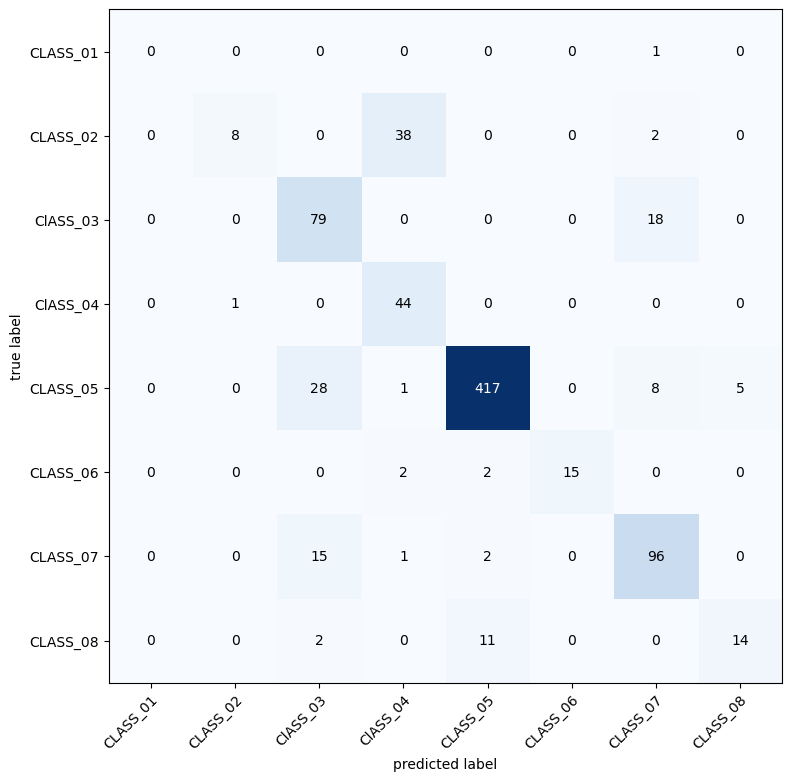

In [38]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score,roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

width_shape = 300
height_shape = 300

names = ['CLASS_01', 'CLASS_02', 'ClASS_03','ClASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = './test/'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (width_shape, height_shape),
    class_mode='categorical',
    shuffle = False)

##para la grafica he usado el modelo que ya fue guardado y entrenado con imagenes train vs el dataset de test
custom_Model = load_model("modelo")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc = confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()
print(metrics.classification_report(y_real, y_pred, digits = 4))